## 데이터의 불균형 문제 처리
- 정상을 정확하게 분류하는 것과 이상을 정확하게 분류하는 것 중 일반적으로 이상을 정확히 분류하는 것이 중요
- 보통 이상 데이터가 target데이터로 사용하는 경우가 많다.
- 데이터가 불균형할때는 분류의 성능과 target데이터를 정확히 분류해내는 목표가 일치하지 않게 된다.
- 이러한 경우 분석걸과의 해석 뿐만이 아니라 머신러닝 등 모델링에서 문제가 발생
- 소수의 데이터인 target의 중요를 낮게 판단하게 되므로 궁극적으로 분석가능한 모델을 생성할 수 없다.
- 이러한 문제를 해결하기 위해 소수의 비정상 데이터를 늘리는 오버 샘플링, 상대적으로 많은 데이터에서 일부만 사용하는 언더 샘플링이 존재

In [1284]:
# 라이브러리 설치
# !pip install imbalanced-learn

### 언더 샘플링
- 다수의 라벨을 가진 데이터를 샘플링하여 소수의 데이터 세트가 가진 라벨의 수 수준으로 감소시키는 방법
- 이 기법은 데이터 불균형 문제는 해결이 가능하지만 전체 데이터의 개수가 줄어들어서 학습 성능이 떨어질 수 있다.

In [1285]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [1286]:
# 랜던 데이터 셋을 하나 생성
# 90 : 10 비율로 생성

x, y = make_classification(n_samples=2000,
                           n_features=5,
                           weights=[0.9],
                           flip_y=0)

In [1287]:
Counter(y)

Counter({np.int64(0): 1801, np.int64(1): 199})

In [1288]:
# 랜덤 언더 샘플링
# 다수의 데이터를 소수의 데이터의 개수만큼 줄여주는 작업
undersampler = RandomUnderSampler()

In [1289]:
x_under, y_under = undersampler.fit_resample(x, y)

In [1290]:
Counter(y_under)

Counter({np.int64(0): 199, np.int64(1): 199})

In [1291]:
# sampling_strategy 매개변수 : 소수의 데이터의 비율을 지정하여 다수의 데이터의 개수를 정한다
undersampler2 = RandomUnderSampler(sampling_strategy=0.3)
x_under2, y_under2 = undersampler2.fit_resample(x, y)

In [1292]:
Counter(y_under2)

Counter({np.int64(0): 663, np.int64(1): 199})

### 오버 샘플링
- 소수의 데이터를 다수의 데이터의 개수만큼 증식시켜 학습에 사용하기 위한 방법
- 데이터의 손실이 없기 떄문에 일반적으로 언더 샘플링보다 성능이 유리하여 주로 사용

In [1293]:
# 랜덤 오버 샘플링
# 소수의 데이터를 단순 복제하여 다수의 데이터의 개수와 비율을 맞춰주는 방법
# 데이터를 단순하게 복제하기 떄문에 분포가 변하지 않는다.
# 수가 증가 하기떄문에 가중치 발생
# 오버피팅의 위험성은 존재하지만 불균형 문제를 처리하지 않는 것 보다는 유효
from imblearn.over_sampling import RandomOverSampler

In [1294]:
oversample = RandomOverSampler()

In [1295]:
x_over, y_over = oversample.fit_resample(x, y)

In [1296]:
Counter(y_over)

Counter({np.int64(0): 1801, np.int64(1): 1801})

In [1297]:
oversample2 = RandomOverSampler(sampling_strategy=0.5)

In [1298]:
x_over2, y_over2 = oversample2.fit_resample(x, y)

In [1299]:
Counter(y_over2)

Counter({np.int64(0): 1801, np.int64(1): 900})

In [1300]:
# SMOTE(Synthetic Minority Over-Sampling Technique)
# 소수의 데이터의 관측값에 대한 k개의 최근접 양수를 이웃을 찾고,
# 관측값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성하는 방법
from imblearn.over_sampling import SMOTE

In [1301]:
smote_sample = SMOTE()

In [1302]:
x_sm, y_sm = smote_sample.fit_resample(x, y)

In [1303]:
Counter(y_sm)

Counter({np.int64(0): 1801, np.int64(1): 1801})

In [1304]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'SMOTE')

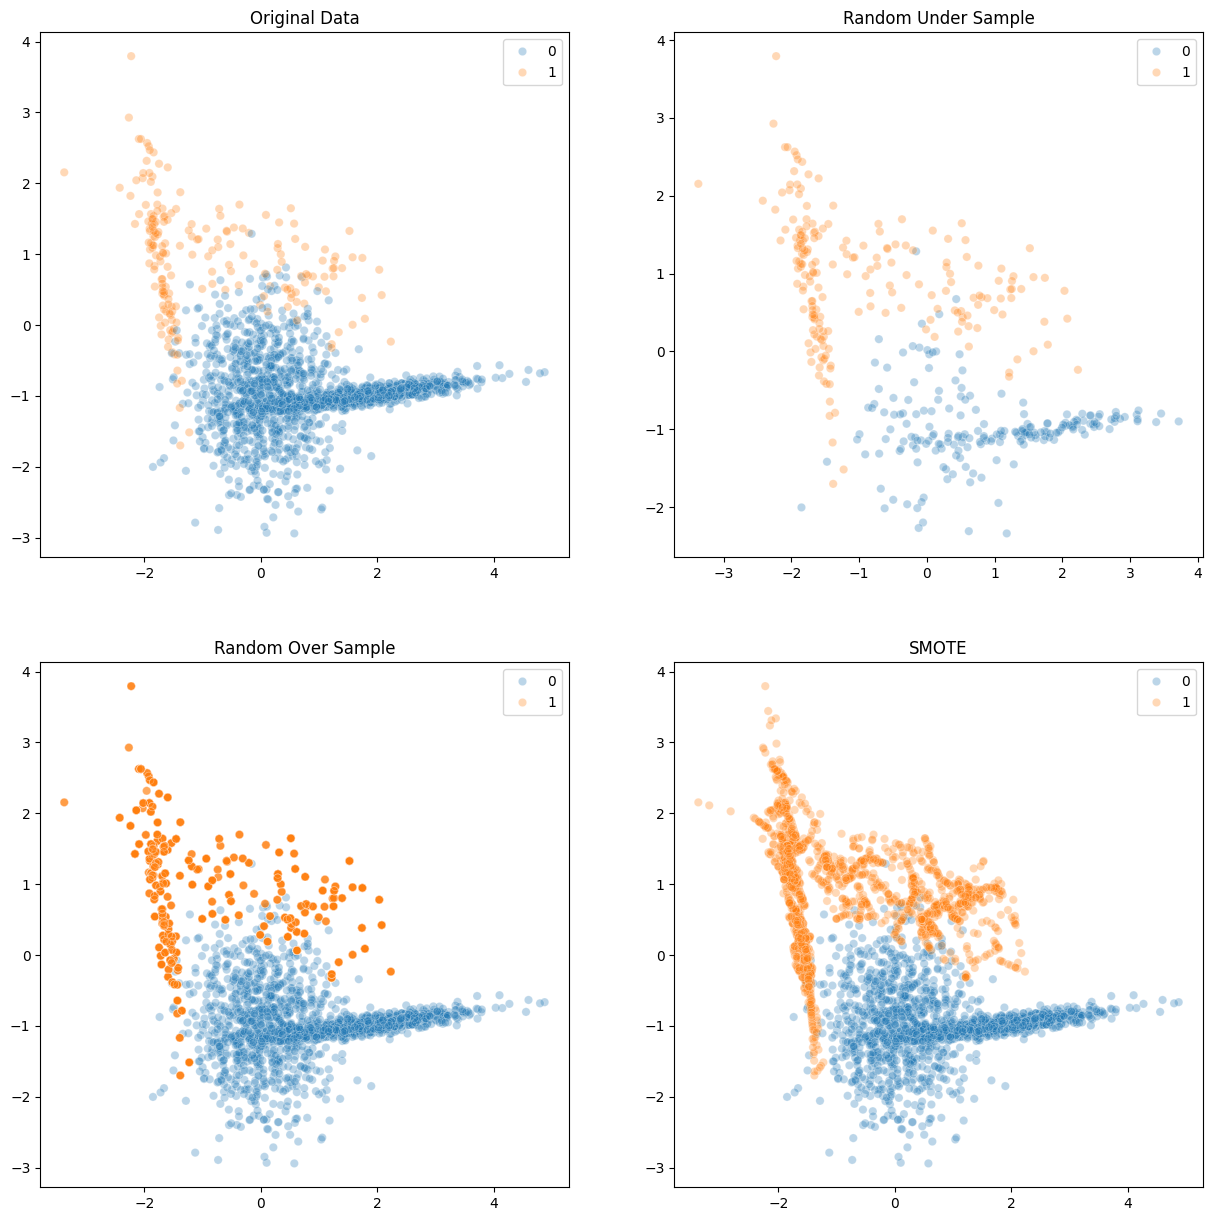

In [1305]:
# 서브 플롯 4개 생성 그래프 사이즈 변경
fig, axes = plt.subplots( nrows = 2, ncols = 2, figsize = (15, 15) )

# 산점도 그래프 4개를 생성
# subplot에 대입
sns.scatterplot(x = x[:, 1], y = x[:, 2], ax = axes[0][0], hue = y, alpha = 0.3)
sns.scatterplot(x = x_under[:, 1], y = x_under[:, 2], ax = axes[0][1], hue = y_under, alpha = 0.3)
sns.scatterplot(x = x_over[:, 1], y = x_over[:, 2], ax = axes[1][0], hue = y_over, alpha = 0.3)
sns.scatterplot(x = x_sm[:, 1], y = x_sm[:, 2], ax = axes[1][1], hue = y_sm, alpha = 0.3)
axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sample')
axes[1][0].set_title('Random Over Sample')
axes[1][1].set_title('SMOTE')